# Unit 5 - Financial Planning


In [ ]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [92]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [65]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [66]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [67]:
# Fetch current BTC price
data_btc = requests.get(btc_url).json()
btc_value = data_btc["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
data_eth = requests.get(eth_url).json()
eth_value = data_eth["data"]["1027"]["quotes"]["USD"]["price"]


# Compute current value of my crpto
my_btc_value = my_btc * btc_value
my_eth_value = my_eth * eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $45073.20
The current value of your 5.3 ETH is $12758.37


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [68]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [69]:
# Set Alpaca API key and secret
#alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [70]:
# Format current date as ISO format
today = pd.Timestamp("2021-04-30", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
).df

# Preview DataFrame
df_portfolio.head()

AGG                                      SPY  \
                             open     high     low  close   volume    open   
time                                                                         
2021-04-30 00:00:00-04:00  114.41  114.515  114.33  114.5  5160765  417.63   

                                                            
                             high     low  close    volume  
time                                                        
2021-04-30 00:00:00-04:00  418.54  416.34  417.3  73129109

In [71]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])                                     
spy_close_price = float(df_portfolio["SPY"]["close"])
                                     
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.5
Current SPY closing price: $417.3


In [72]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20865.00
The current value of your 200 AGG shares is $22900.00


### Savings Health Analysis

In [73]:
# Set monthly household income
monthly_income = 12000
total_crypto = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value
data = {'amount':[total_crypto, total_shares_value]}

# Create savings DataFrame
df_savings = pd.DataFrame(data, index =['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,57831.572
shares,43765.000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

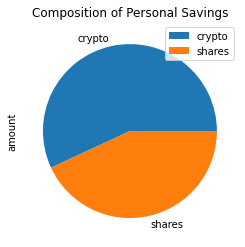

In [74]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [75]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares_value

# Validate saving health
if emergency_fund < total_savings:
    print("Congratulations! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
    print("You have reach your financial goal")
else:
    print(f"You are {emergency_fun - total_savings} dollars away from reaching the goal")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [76]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-04-30', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-04-30', tz='America/New_York').isoformat()

In [77]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG", "SPY"]
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 500,
).df
df_stock_data.index = df_stock_data.index.date

# Display sample data
df_stock_data.head()

AGG                                         SPY          \
              open      high      low   close   volume    open    high   
2019-05-08  108.74  108.8100  108.550  108.57  5808492  287.53  289.43   
2019-05-09  108.78  108.8100  108.550  108.67  4669136  285.23  287.33   
2019-05-10  108.74  108.8200  108.630  108.67  4810765  285.62  288.94   
2019-05-13  108.83  108.9768  108.815  108.86  5116696  282.42  283.49   
2019-05-14  108.90  108.9700  108.740  108.94  4976560  281.99  285.10   

                                         
               low     close     volume  
2019-05-08  286.87  287.5600   75117753  
2019-05-09  283.30  286.7500   90532298  
2019-05-10  282.30  288.0300   97407327  
2019-05-13  279.93  280.9905  106597028  
2019-05-14  281.85  283.3300   68269143

In [78]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(portfolio_data = df_stock_data, weights = [.40, .60], num_simulation = 500, num_trading_days = 252*30)

In [ ]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

In [80]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006449,1.002006,1.003393,0.999387,1.002576,1.002319,0.992052,1.002706,1.003477,0.998768,...,1.023660,0.996693,0.997692,1.003096,1.003013,1.009720,1.003259,0.999421,0.989228,0.994870
2,1.008973,1.019993,1.005100,1.001252,0.992480,1.003298,0.976538,0.999433,1.026813,0.986845,...,1.018748,0.991794,0.993382,0.996911,0.983363,1.010423,1.005953,0.989753,1.007124,0.994604
3,1.018392,1.006909,1.002069,1.002660,1.000291,0.988143,0.976935,0.999299,1.026518,0.985775,...,1.031150,0.980921,1.007971,1.010038,1.003601,1.007748,1.002388,0.971182,1.000947,0.987932
4,1.006870,1.009770,0.983966,1.011866,0.992531,0.986408,0.968863,0.995746,1.011356,0.975331,...,1.024972,0.983609,0.996773,1.013132,0.995009,1.002300,1.001255,0.963359,1.016635,0.979949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,122.944455,103.143156,8.286290,233.911167,37.039214,20.235706,209.113034,38.327254,165.763721,48.019608,...,36.365119,350.538588,40.599158,49.703448,18.828306,28.119428,57.482630,126.712606,60.225738,86.498258
7557,123.153564,103.399778,8.485599,233.174528,37.356071,20.305744,212.972746,39.223124,166.887584,48.095016,...,36.041494,350.122872,40.102345,49.462848,18.864585,27.960860,57.576798,124.347549,60.423058,85.981298
7558,123.617450,102.254481,8.449851,233.252896,37.250797,19.980198,213.774652,39.176375,164.837040,47.821340,...,36.507214,346.199125,39.824564,48.937644,19.070351,28.187492,57.730099,124.631686,60.467566,86.064907
7559,122.740716,100.040043,8.434104,232.072711,37.311564,19.300784,208.841772,38.766651,163.201769,47.758917,...,36.927334,345.152460,40.198937,48.172794,19.382427,28.113770,58.778338,126.424647,60.684717,86.720422


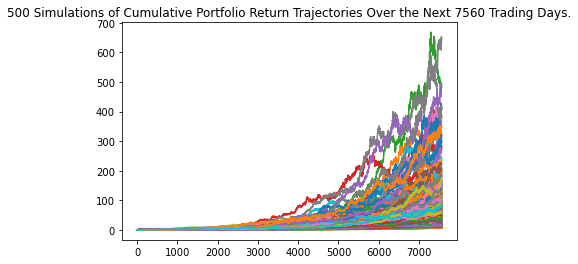

In [94]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

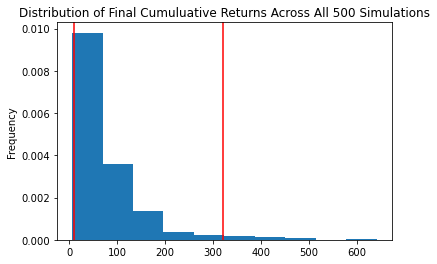

In [93]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [95]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean             77.203341
std              78.751807
min               5.996207
25%              29.569556
50%              50.459099
75%              89.888668
max             640.393073
95% CI Lower     10.832326
95% CI Upper    321.261679
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [96]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $216646.53 and $6425233.58


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [97]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
tbl = MC_even_dist.summarize_cumulative_return()
ci_lower = round(tbl[8]*20000*1.5,2)
ci_upper = round(tbl[9]*20000*1.5,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $324969.79 and $9637850.37


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [86]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

# Print the simulation input data

In [87]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

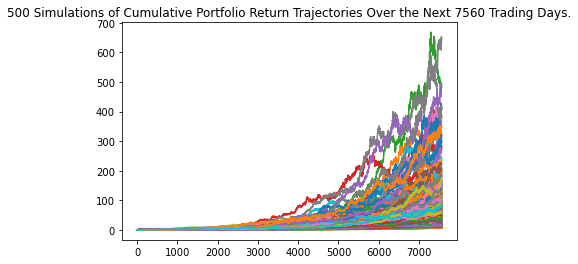

In [88]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_even_dist.plot_simulation()

In [89]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!


In [90]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics


In [91]:
# Set initial investment

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'ci_lower_five' is not defined

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")